In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd

from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle

import seaborn as sns
import matplotlib.pyplot as plt

# A.Using only RGB features

In [ ]:
df=pd.read_csv("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/datafiles/rgbarray.csv")
labels = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/datafiles/labeldata.npy")

In [ ]:
X=df
Y=labels
rs=42
X

,red_val,green_val,blue_val
0,79.521870,109.512877,37.915592
1,75.679507,105.365517,36.042771
2,73.817239,103.502585,34.868638
3,74.141495,102.659802,39.490112
4,73.841558,102.396006,38.074632
...,...,...,...
595,83.586370,106.100868,32.502262
596,83.258601,94.892797,25.081329
597,89.934311,102.587774,27.332004
598,56.277831,75.547299,10.651658


0.89 accuracy with a standard deviation of 0.16


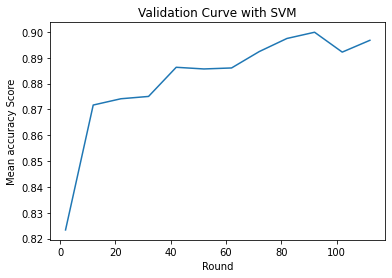

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=rs))

scores = cross_val_score(clf, X, Y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

means=[cross_val_score(clf, X, Y, cv=i).mean() for i in range(2,120,10)]

plt.title("Validation Curve with SVM")
plt.xlabel("Round")
plt.ylabel("Mean accuracy Score")
plt.plot(np.arange(2,120,10,dtype=int),means)


### Model reaches 90% accuracy in 90th fold of cross validation

# B. Using the Metadata with RGB

In [ ]:
metadata=pd.read_csv('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/datafiles/metadata.csv')

## B-1 Brightness Only as metadata

In [ ]:
df=pd.read_csv("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/datafiles/rgbarray.csv")
df['brightness']=metadata['brightness']
X=df[0:]
Y=labels
rs=42
X

,red_val,green_val,blue_val,brightness
0,79.521870,109.512877,37.915592,4.85
1,75.679507,105.365517,36.042771,4.92
2,73.817239,103.502585,34.868638,4.93
3,74.141495,102.659802,39.490112,5.03
4,73.841558,102.396006,38.074632,5.04
...,...,...,...,...
595,83.586370,106.100868,32.502262,5.04
596,83.258601,94.892797,25.081329,5.51
597,89.934311,102.587774,27.332004,5.35
598,56.277831,75.547299,10.651658,5.29


0.93 accuracy with a standard deviation of 0.12


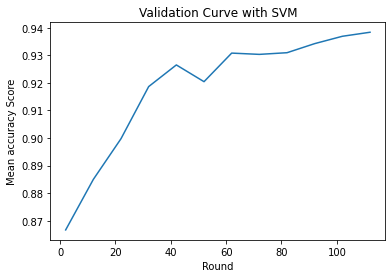

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=rs))

scores = cross_val_score(clf, X, Y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

means=[cross_val_score(clf, X, Y, cv=i).mean() for i in range(2,120,10)]

plt.title("Validation Curve with SVM")
plt.xlabel("Round")
plt.ylabel("Mean accuracy Score")
plt.plot(np.arange(2,120,10,dtype=int),means)


### Reaches 94% accuracy at 100th round

## B-2 Using Shutter speed alone as metadata

In [ ]:
df=pd.read_csv("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/datafiles/rgbarray.csv")
df['shutter_speed']=metadata['shutter_speed']
X=df[0:]
Y=labels
rs=42
X

,red_val,green_val,blue_val,shutter_speed
0,79.521870,109.512877,37.915592,8.976
1,75.679507,105.365517,36.042771,9.066
2,73.817239,103.502585,34.868638,9.109
3,74.141495,102.659802,39.490112,9.193
4,73.841558,102.396006,38.074632,9.193
...,...,...,...,...
595,83.586370,106.100868,32.502262,9.024
596,83.258601,94.892797,25.081329,9.574
597,89.934311,102.587774,27.332004,9.323
598,56.277831,75.547299,10.651658,9.367


0.94 accuracy with a standard deviation of 0.12


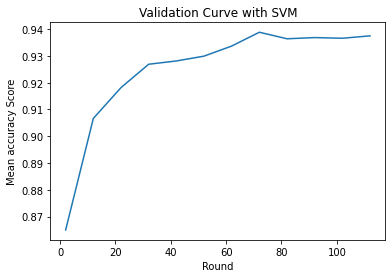

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=rs))

scores = cross_val_score(clf, X, Y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

means=[cross_val_score(clf, X, Y, cv=i).mean() for i in range(2,120,10)]

plt.title("Validation Curve with SVM")
plt.xlabel("Round")
plt.ylabel("Mean accuracy Score")
plt.plot(np.arange(2,120,10,dtype=int),means)

### Accuracy converges near 94% at 100th round

## B-3 Using Exposure time alone as metadata

In [ ]:
df=pd.read_csv("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/datafiles/rgbarray.csv")
df['exposure_time']=metadata['exposure_time']
X=df[0:]
Y=labels
rs=42
X

,red_val,green_val,blue_val,exposure_time
0,79.521870,109.512877,37.915592,0.001984
1,75.679507,105.365517,36.042771,0.001866
2,73.817239,103.502585,34.868638,0.001808
3,74.141495,102.659802,39.490112,0.001709
4,73.841558,102.396006,38.074632,0.001709
...,...,...,...,...
595,83.586370,106.100868,32.502262,0.001919
596,83.258601,94.892797,25.081329,0.001311
597,89.934311,102.587774,27.332004,0.001560
598,56.277831,75.547299,10.651658,0.001515


0.94 accuracy with a standard deviation of 0.11


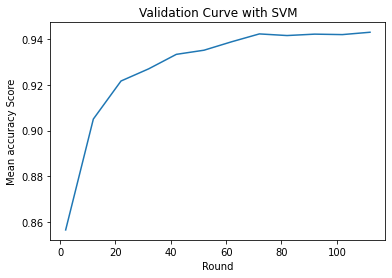

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=rs))

scores = cross_val_score(clf, X, Y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

means=[cross_val_score(clf, X, Y, cv=i).mean() for i in range(2,120,10)]

plt.title("Validation Curve with SVM")
plt.xlabel("Round")
plt.ylabel("Mean accuracy Score")
plt.plot(np.arange(2,120,10,dtype=int),means)

### Accuracy converges around 94%

## B-4 Using ISO alone as metadata

In [ ]:
df=pd.read_csv("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/datafiles/rgbarray.csv")
df['iso']=metadata['iso']
X=df[0:]
Y=labels
rs=42
X

,red_val,green_val,blue_val,iso
0,79.521870,109.512877,37.915592,100.0
1,75.679507,105.365517,36.042771,125.0
2,73.817239,103.502585,34.868638,125.0
3,74.141495,102.659802,39.490112,100.0
4,73.841558,102.396006,38.074632,100.0
...,...,...,...,...
595,83.586370,106.100868,32.502262,125.0
596,83.258601,94.892797,25.081329,100.0
597,89.934311,102.587774,27.332004,125.0
598,56.277831,75.547299,10.651658,125.0


0.87 accuracy with a standard deviation of 0.16


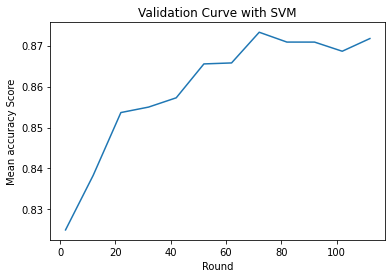

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=rs))

scores = cross_val_score(clf, X, Y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

means=[cross_val_score(clf, X, Y, cv=i).mean() for i in range(2,120,10)]

plt.title("Validation Curve with SVM")
plt.xlabel("Round")
plt.ylabel("Mean accuracy Score")
plt.plot(np.arange(2,120,10,dtype=int),means)

### Accuracy reaches maximum for the initial accuracy of RGB, or lesser.

In [ ]:
df['brightness']=metadata['brightness']
df['shutter_speed']=metadata['shutter_speed']
df['exposure_time']=metadata['exposure_time']
df['iso']=metadata['iso']
df

,red_val,green_val,blue_val,iso,brightness,shutter_speed,exposure_time
0,79.521870,109.512877,37.915592,100.0,4.85,8.976,0.001984
1,75.679507,105.365517,36.042771,125.0,4.92,9.066,0.001866
2,73.817239,103.502585,34.868638,125.0,4.93,9.109,0.001808
3,74.141495,102.659802,39.490112,100.0,5.03,9.193,0.001709
4,73.841558,102.396006,38.074632,100.0,5.04,9.193,0.001709
...,...,...,...,...,...,...,...
595,83.586370,106.100868,32.502262,125.0,5.04,9.024,0.001919
596,83.258601,94.892797,25.081329,100.0,5.51,9.574,0.001311
597,89.934311,102.587774,27.332004,125.0,5.35,9.323,0.001560
598,56.277831,75.547299,10.651658,125.0,5.29,9.367,0.001515


# With RGB and Metadata excluding ISO

In [ ]:
X=df[0:]
Y=labels
X

In [ ]:
rs=42

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=rs))

scores = cross_val_score(clf, X, Y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

means=[cross_val_score(clf, X, Y, cv=i).mean() for i in range(2,120,10)]


0.95 accuracy with a standard deviation of 0.10


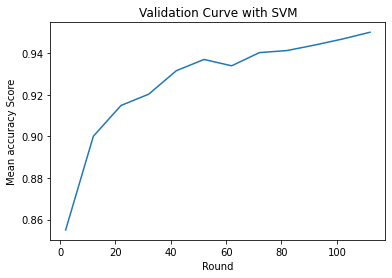

In [ ]:
plt.title("Validation Curve with SVM")
plt.xlabel("Round")
plt.ylabel("Mean accuracy Score")
plt.plot(np.arange(2,120,10,dtype=int),means)

### Accuracy reaches 95% for cross validation rounds count exceeding 100